In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
# show 10 data from dataset
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# Classes of target value - quality
set(data.quality)
# 3 is bad quality and 8 is one of the best quality

{3, 4, 5, 6, 7, 8}

In [4]:
# Description of the given dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# To check the missing values 
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

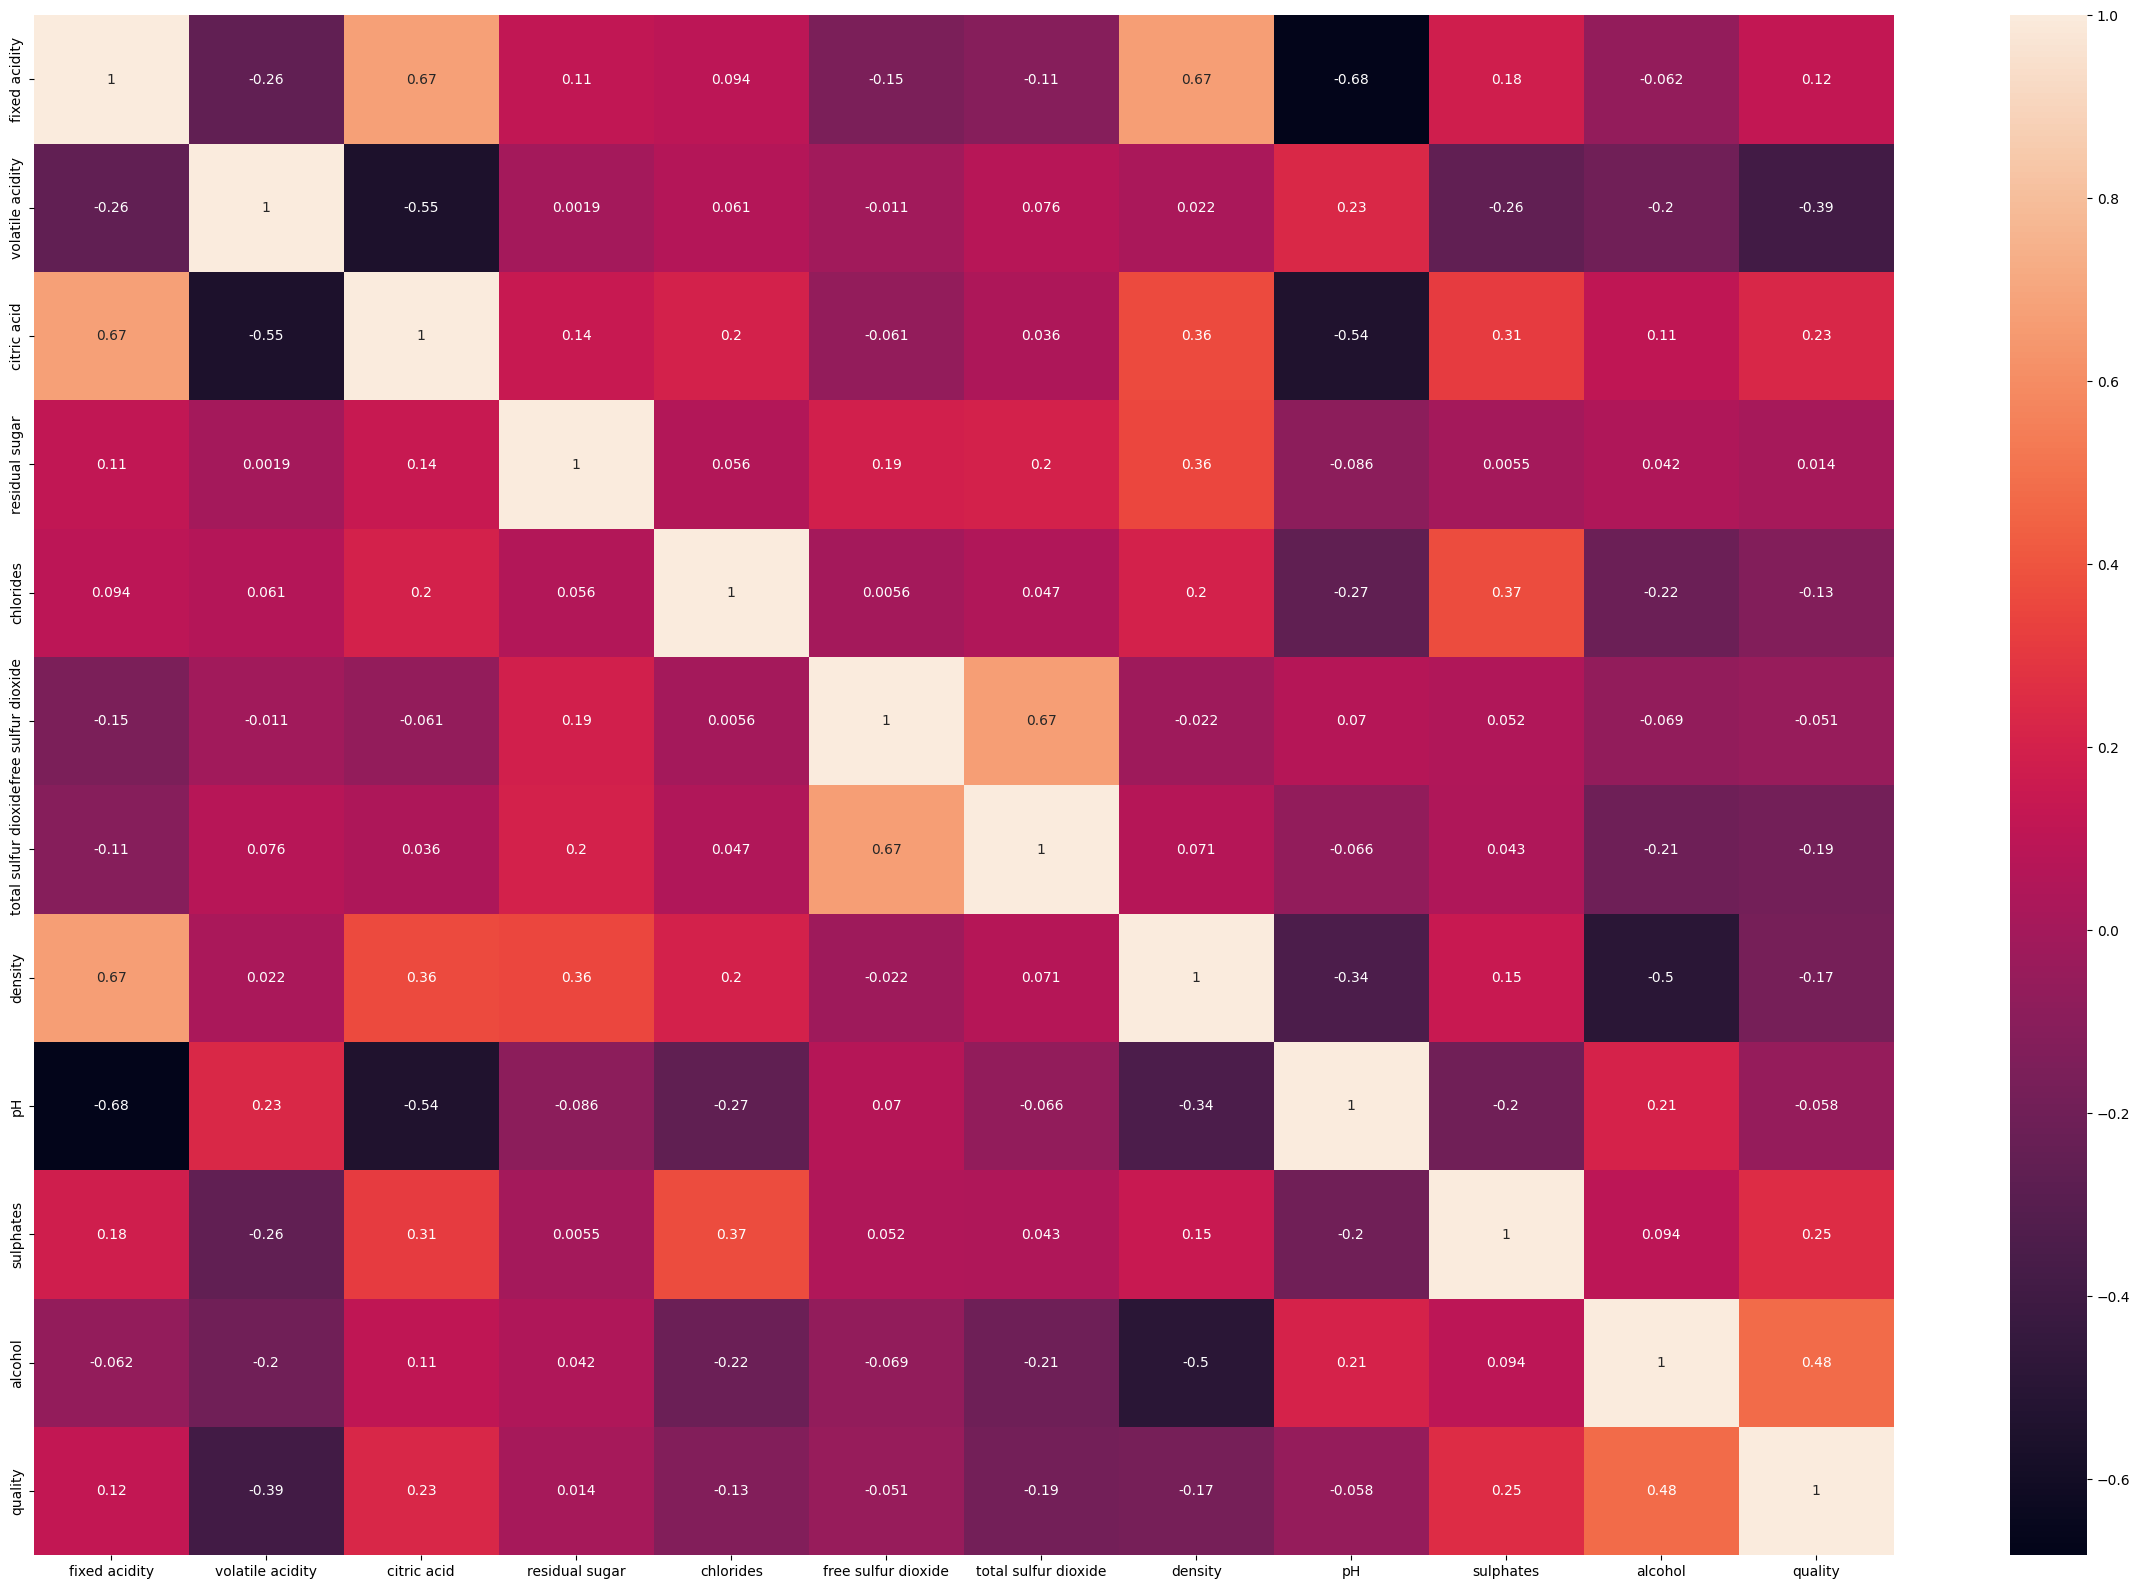

In [6]:
# Correlation Matrix among all features inside the dataset
plt.figure(figsize =(30,20))
corr = data.corr()
sns.heatmap(corr,annot = True)
# plt.savefig("correlation matrix.png")
plt.show

In [7]:
# Detection of outliers using z-score
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [8]:
# z>3(Threshold) -> This is an outlier
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [9]:
# Remove those records whose z>3 (outlier)
new_data = data[(z < 3).all(axis = 1)]

In [10]:
new_data.shape

(1451, 12)

In [11]:
data.shape

(1599, 12)

**Data splitting into feature(x) and target columns()**

In [12]:
from sklearn.model_selection import train_test_split
# X = input feature
x = new_data.drop(columns = "quality")
# y = outcome
y = new_data['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## **Data Modeling using Random forest Classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel = RandomForestClassifier(n_estimators = 100)

In [16]:
rf_classificationModel.fit(x_train, y_train)

RandomForestClassifier()

### **Prediction of data using random forest model**

In [17]:
y_pred = rf_classificationModel.predict(x_test)

In [18]:
y_pred

array([7, 5, 7, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 7,
       7, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 6, 5, 7, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 7, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 7, 5, 7, 5, 5, 6, 5, 8, 6, 7,
       6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 7, 7, 5, 6, 5, 6, 5, 7, 7, 6, 5, 7,
       6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5,
       7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 7, 5, 6,
       5, 5, 5, 5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       7, 6, 5, 5, 6, 7, 6, 5, 5, 7, 6, 5, 6, 5, 5, 5, 7, 7, 6, 6, 6, 6,
       8, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 7, 6, 7, 5, 5, 6, 7, 6,
       7, 6, 6, 6, 5])

**Data Evaluation on metrics**

In [19]:
from sklearn import metrics
print('Accuracy Score', metrics.accuracy_score(y_test, y_pred))

Accuracy Score 0.6941580756013745


### Accuracy Score: 70.5%
    1. Hyperparameter Tuning -> GridSearchCV

[Text(0.4397644352791878, 0.975, 'x[4] <= 0.075\ngini = 0.628\nsamples = 736\nvalue = [41, 505, 477, 125, 12]'),
 Text(0.1417036802030457, 0.925, 'x[1] <= 0.375\ngini = 0.644\nsamples = 259\nvalue = [13, 132, 199, 56, 12]'),
 Text(0.05406091370558375, 0.875, 'x[8] <= 3.285\ngini = 0.622\nsamples = 74\nvalue = [1, 13, 61, 40, 6]'),
 Text(0.01979695431472081, 0.825, 'x[1] <= 0.195\ngini = 0.666\nsamples = 33\nvalue = [0, 6, 16, 24, 6]'),
 Text(0.008121827411167513, 0.775, 'x[6] <= 17.5\ngini = 0.32\nsamples = 2\nvalue = [0, 4, 1, 0, 0]'),
 Text(0.0040609137055837565, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.012182741116751269, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [0, 4, 0, 0, 0]'),
 Text(0.03147208121827411, 0.775, 'x[10] <= 10.15\ngini = 0.619\nsamples = 31\nvalue = [0, 2, 15, 24, 6]'),
 Text(0.02030456852791878, 0.725, 'x[0] <= 11.8\ngini = 0.406\nsamples = 6\nvalue = [0, 0, 6, 1, 1]'),
 Text(0.016243654822335026, 0.675, 'gini = 0.0\nsamples = 4\nvalue = 

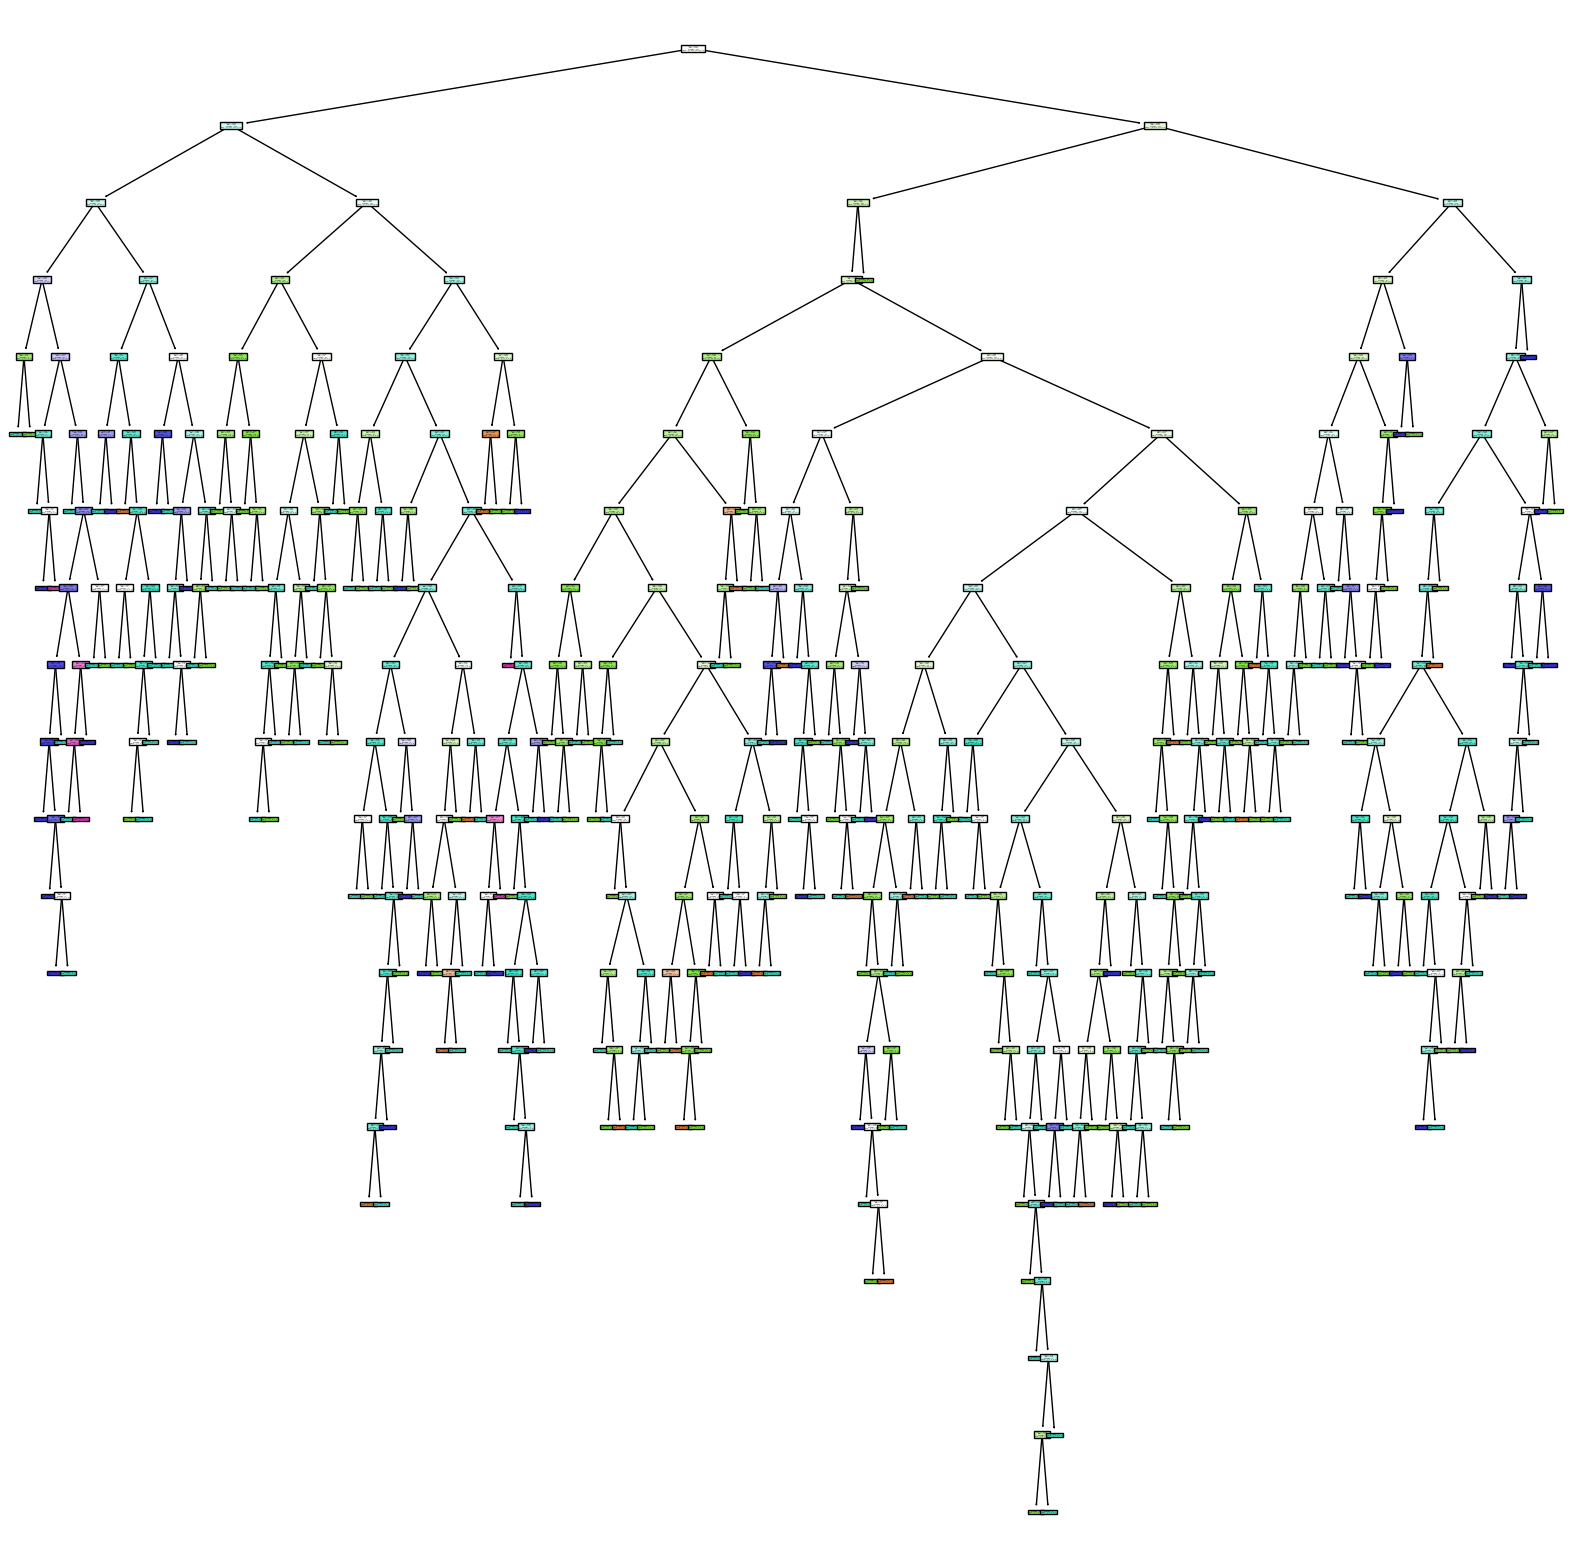

In [20]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0], filled = True)

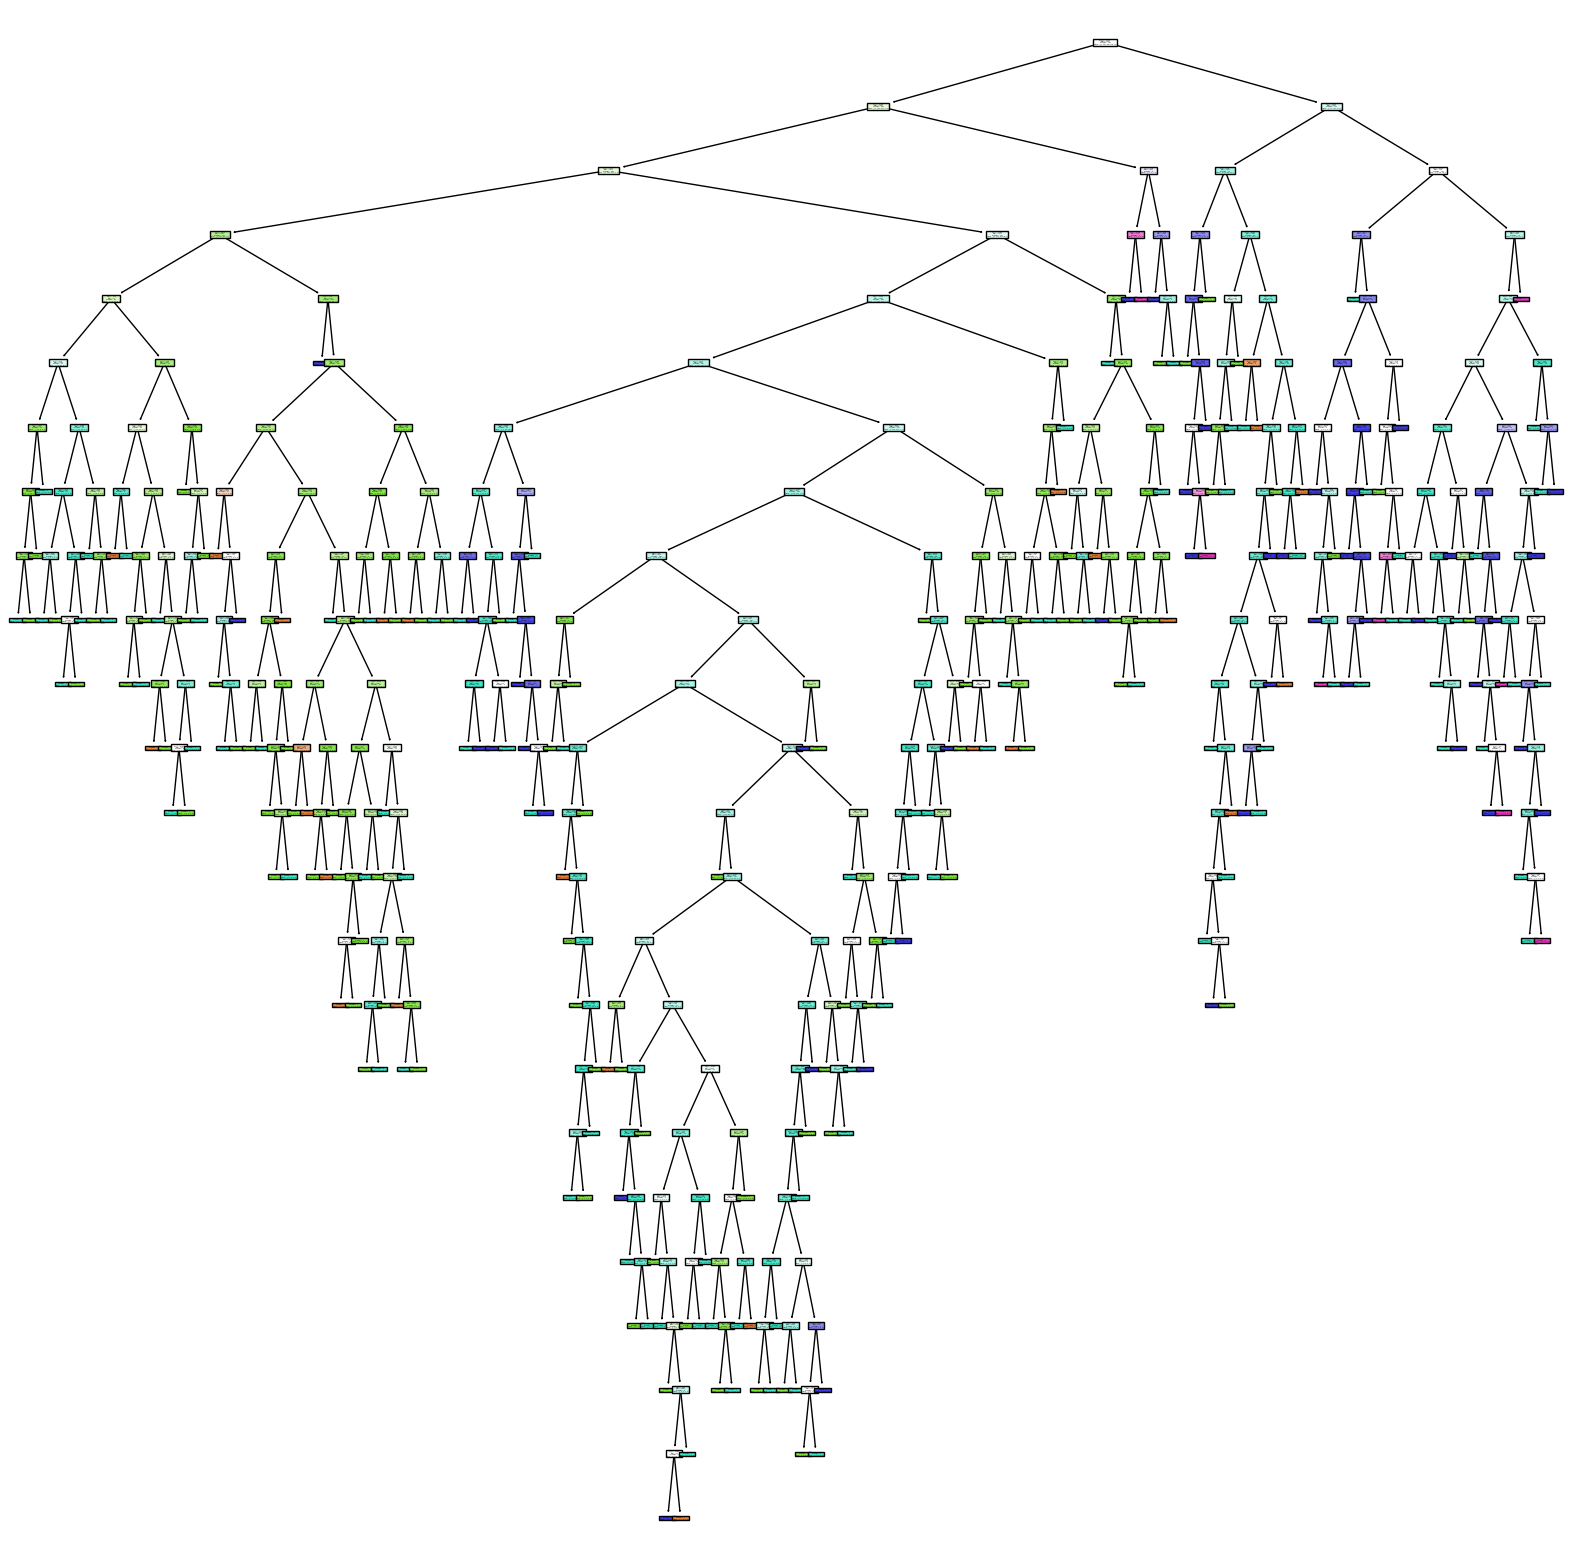

In [21]:
plt.figure(figsize=(20,20))
for i in range(len(rf_classificationModel.estimators_)):
    tree.plot_tree(rf_classificationModel.estimators_[i], filled = True)